### RGB Task

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100

CLASS_NAMES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

(train_images, train_targets), (test_images, test_targets) = cifar100.load_data()

print(np.unique(test_targets))
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


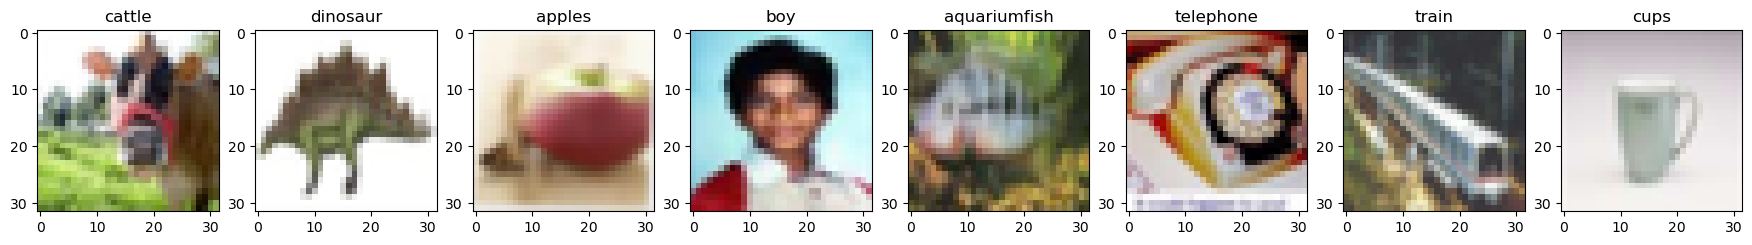

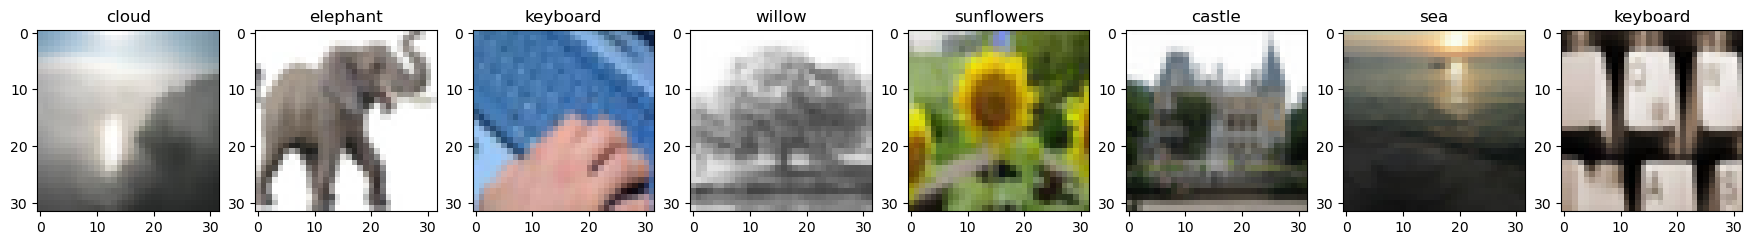

In [2]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    class_names = CLASS_NAMES
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(class_names[int(target)])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [3]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [4]:
train_images[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7647059 , 0.8039216 , 0.75686276],
        [0.83137256, 0.8784314 , 0.8       ],
        [0.7137255 , 0.7607843 , 0.654902  ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6666667 , 0.6901961 , 0.5882353 ],
        [0.6313726 , 0.65882355, 0.50980395],
        [0.57254905, 0.6039216 , 0.44313726]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7411765 , 0.78039217, 0.6627451 ],
        [0.6509804 , 0.69803923, 0.50980395],
        [0.4745098 , 0.52156866, 0.34117648]],

       ...,

       [[0.5803922 , 0.7254902 , 0.30980393],
        [0.5568628 , 0.7137255 , 0.22352941],
        [0.54901963, 0

In [5]:
# squeeze() 함수를 통해 1차원으로 만들어 놓는다. -> 불필요한 차원 제거 

train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu', name='relu001')(x)
#-----------------------------1 Set-------------------------------------#
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='relu002')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='relu003')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='relu004')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='relu005')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu', name='relu006')(x)
x = MaxPooling2D(2)(x)
#-----------------------------Final Conv Set-------------------------------------#

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(100, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

# 해당 Dense Layer 에는 파라미터 수 가 그렇게 많지 않기에, 규제를 따로 걸지 않아도 된다. 학습 목적으로 사용함 
# 규제 먼저 걸지말자.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu001 (Activation)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu002 (Activation)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu003 (Activation)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu004 (Activation)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu005 (Activation)                 │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,0

 Total params: 1,256,192 (4.79 MB)

 Trainable params: 1,254,400 (4.79 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1, # 학습률을 감소 시킬 비율 
    patience=2, # 학습률을 줄이기 전에 monitor 할 반복 횟수
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)


In [8]:
history = model.fit(x=train_images, y=train_targets, batch_size=32, epochs=30, validation_split=0.2, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 127ms/step - acc: 0.0418 - loss: 4.4994 - val_acc: 0.1197 - val_loss: 3.6823 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 168s 135ms/step - acc: 0.1076 - loss: 3.7343 - val_acc: 0.1503 - val_loss: 3.5242 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 179s 143ms/step - acc: 0.1685 - loss: 3.3566 - val_acc: 0.1910 - val_loss: 3.3472 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 178s 143ms/step - acc: 0.2200 - loss: 3.0712 - val_acc: 0.2793 - val_loss: 2.8419 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 312s 250ms/step - acc: 0.2691 - loss: 2.8350 - val_acc: 0.2838 - val_loss: 2.8496 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 342s 274ms/step - acc: 0.3149 - loss: 2.6359 - val_acc: 0.3137 - val_loss: 2.7372 - learning_rate: 0.0010
Epoch 7/30
 281/1250 ━━━━━━━━━━━━━━━━━━━━ 4:07 255ms/step - acc: 0.3376 - loss: 2.5052


KeyboardInterrupt



In [10]:
model.evaluate(test_images, test_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - acc: 0.3105 - loss: 2.7319


[2.735504388809204, 0.3091999888420105]

In [15]:
# import matplotlib.pyplot as plt

# def show_history(history) : 
#     plt.plot(history.history['acc'], label='train')
#     plt.plot(history.history['val_acc'], label='validation')
#     # plt.ylim(0.8, 1.3)
#     plt.legend()
#     plt.show()

# show_history(history)

In [2]:
model.load_weights('./callback_files/weights.006-2.7372-0.3200.weights.h5')

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.evaluate(test_images, test_targets)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
[71 57 76 99 81 69 40 43]


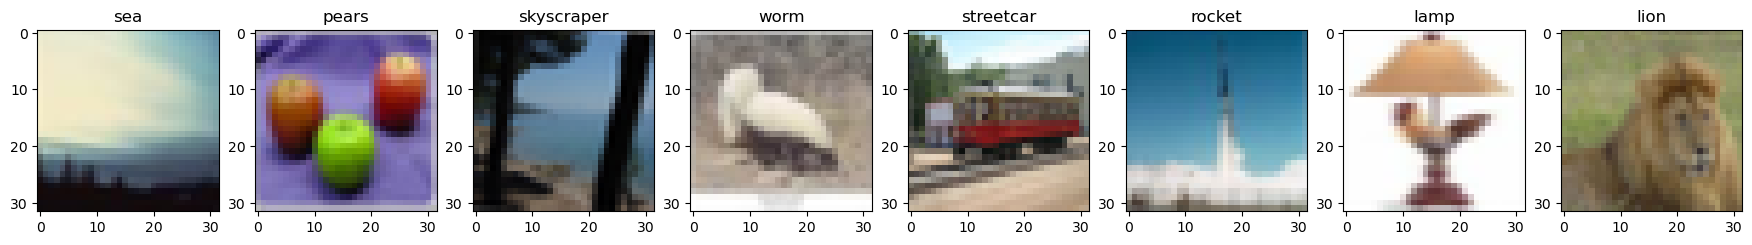

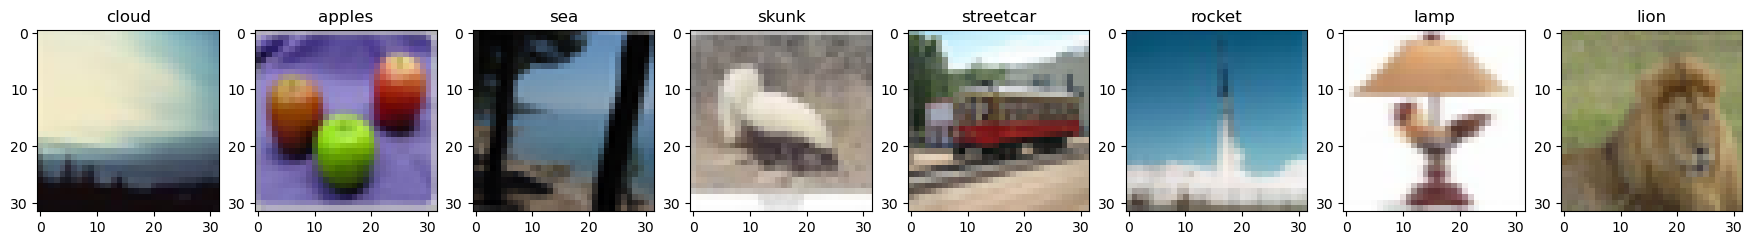

In [14]:
pred_probas = model.predict(test_images[8:16], batch_size=32)
pred_classes = np.argmax(pred_probas.squeeze(), axis=1)
print(pred_classes)

show_images(test_images[8:16], pred_classes)
show_images(test_images[8:16], test_targets[8:16])